In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('/content/churn-bigml-80.csv')


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [32]:
df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [81]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
import plotly.express as px
fig=px.violin(x=df['Area code'], points='all')
fig.update_layout(
    title=dict(text="Distribución de datos en la Columna Age (Datos sin Limpiar)", font=dict(size=18), automargin=True,y=0.95,x=0.5, yanchor= 'top' , xanchor= 'center'),
    xaxis_title="Area code",
    yaxis_title="Distribución"
)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<ipython-input-39-7d7aefc2835e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




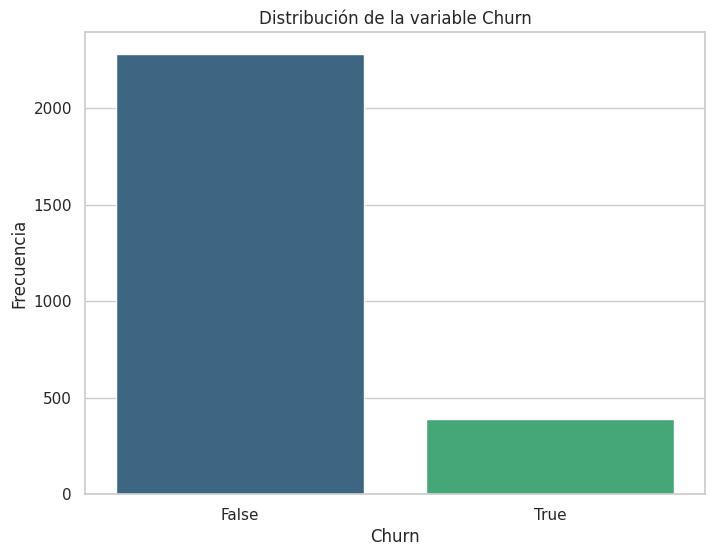

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Distribución de la variable objetivo (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de las variables numéricas
numeric_summary = df.describe()

numeric_summary

<ipython-input-40-e9769032a3d0>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




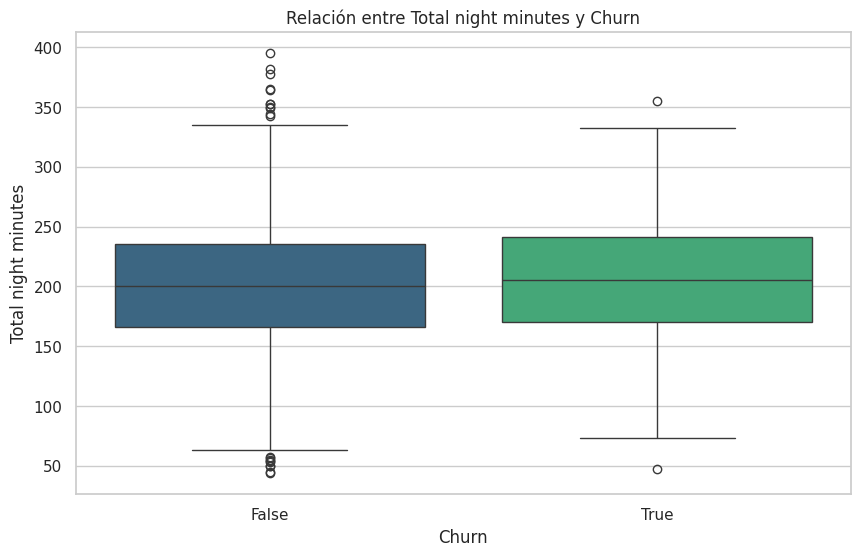

In [40]:
sns.set(style="whitegrid")

# Relación entre Total night minutes y Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total night minutes', data=df, palette='viridis')
plt.title('Relación entre Total night minutes y Churn')
plt.xlabel('Churn')
plt.ylabel('Total night minutes')
plt.show()

Distribución Similar:

La mediana de Total night minutes es similar tanto para los clientes que hicieron "Churn" (True) como para los que no (False). Esto sugiere que el uso promedio de minutos nocturnos es comparable entre ambos grupos.

Rango Intercuartil Similar:

El rango intercuartil (IQR), que se muestra por las cajas, es bastante similar para ambos grupos. Esto indica que la mayoría de los valores de Total night minutes están distribuidos de manera similar entre los clientes que hicieron "Churn" y los que no.

Outliers:

Hay varios valores atípicos (outliers) en ambos grupos, pero parecen ser más frecuentes en los clientes que no hicieron "Churn" (False). Estos outliers indican que algunos clientes usan una cantidad significativamente mayor o menor de minutos nocturnos en comparación con la mayoría.

<ipython-input-41-603aa899c848>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-41-603aa899c848>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




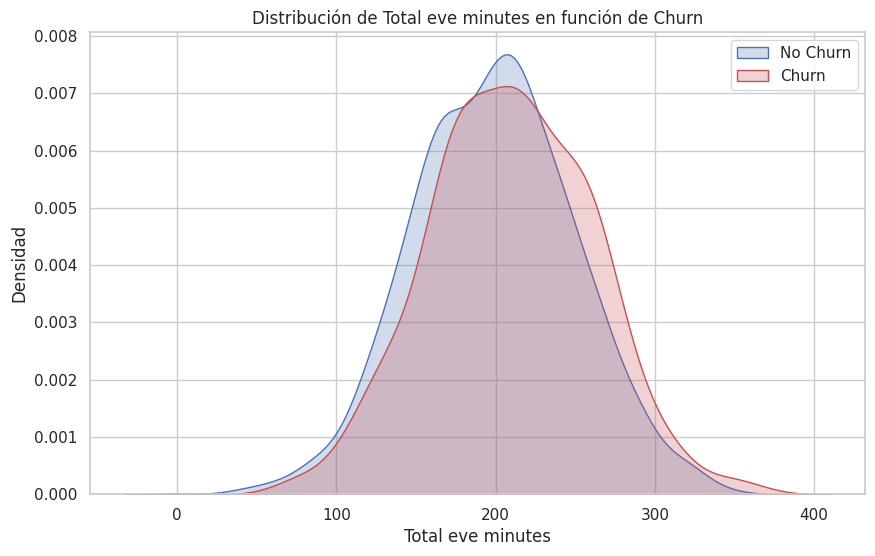

In [41]:
# Distribución de Total eve minutes en función de Churn

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == False]['Total eve minutes'], label='No Churn', shade=True, color='b')
sns.kdeplot(data=df[df['Churn'] == True]['Total eve minutes'], label='Churn', shade=True, color='r')
plt.title('Distribución de Total eve minutes en función de Churn')
plt.xlabel('Total eve minutes')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Distribuciones Superpuestas:

Las distribuciones de Total eve minutes para los clientes que hicieron "Churn" (rojo) y los que no (azul) están bastante superpuestas. Esto sugiere que no hay una diferencia clara en el uso de minutos nocturnos entre los dos grupos.

Pico de Distribución:

El pico de la distribución para los clientes que no hicieron "Churn" es ligeramente más alto que para los que sí hicieron "Churn". Esto indica que hay una mayor concentración de clientes que no hicieron "Churn" con un uso de minutos nocturnos alrededor de 200 minutos.

Colas de la Distribución:

Las colas de las distribuciones son similares, lo que sugiere que tanto los clientes que hicieron "Churn" como los que no tienen una pequeña cantidad de usuarios con un uso muy alto o muy bajo de minutos nocturnos.

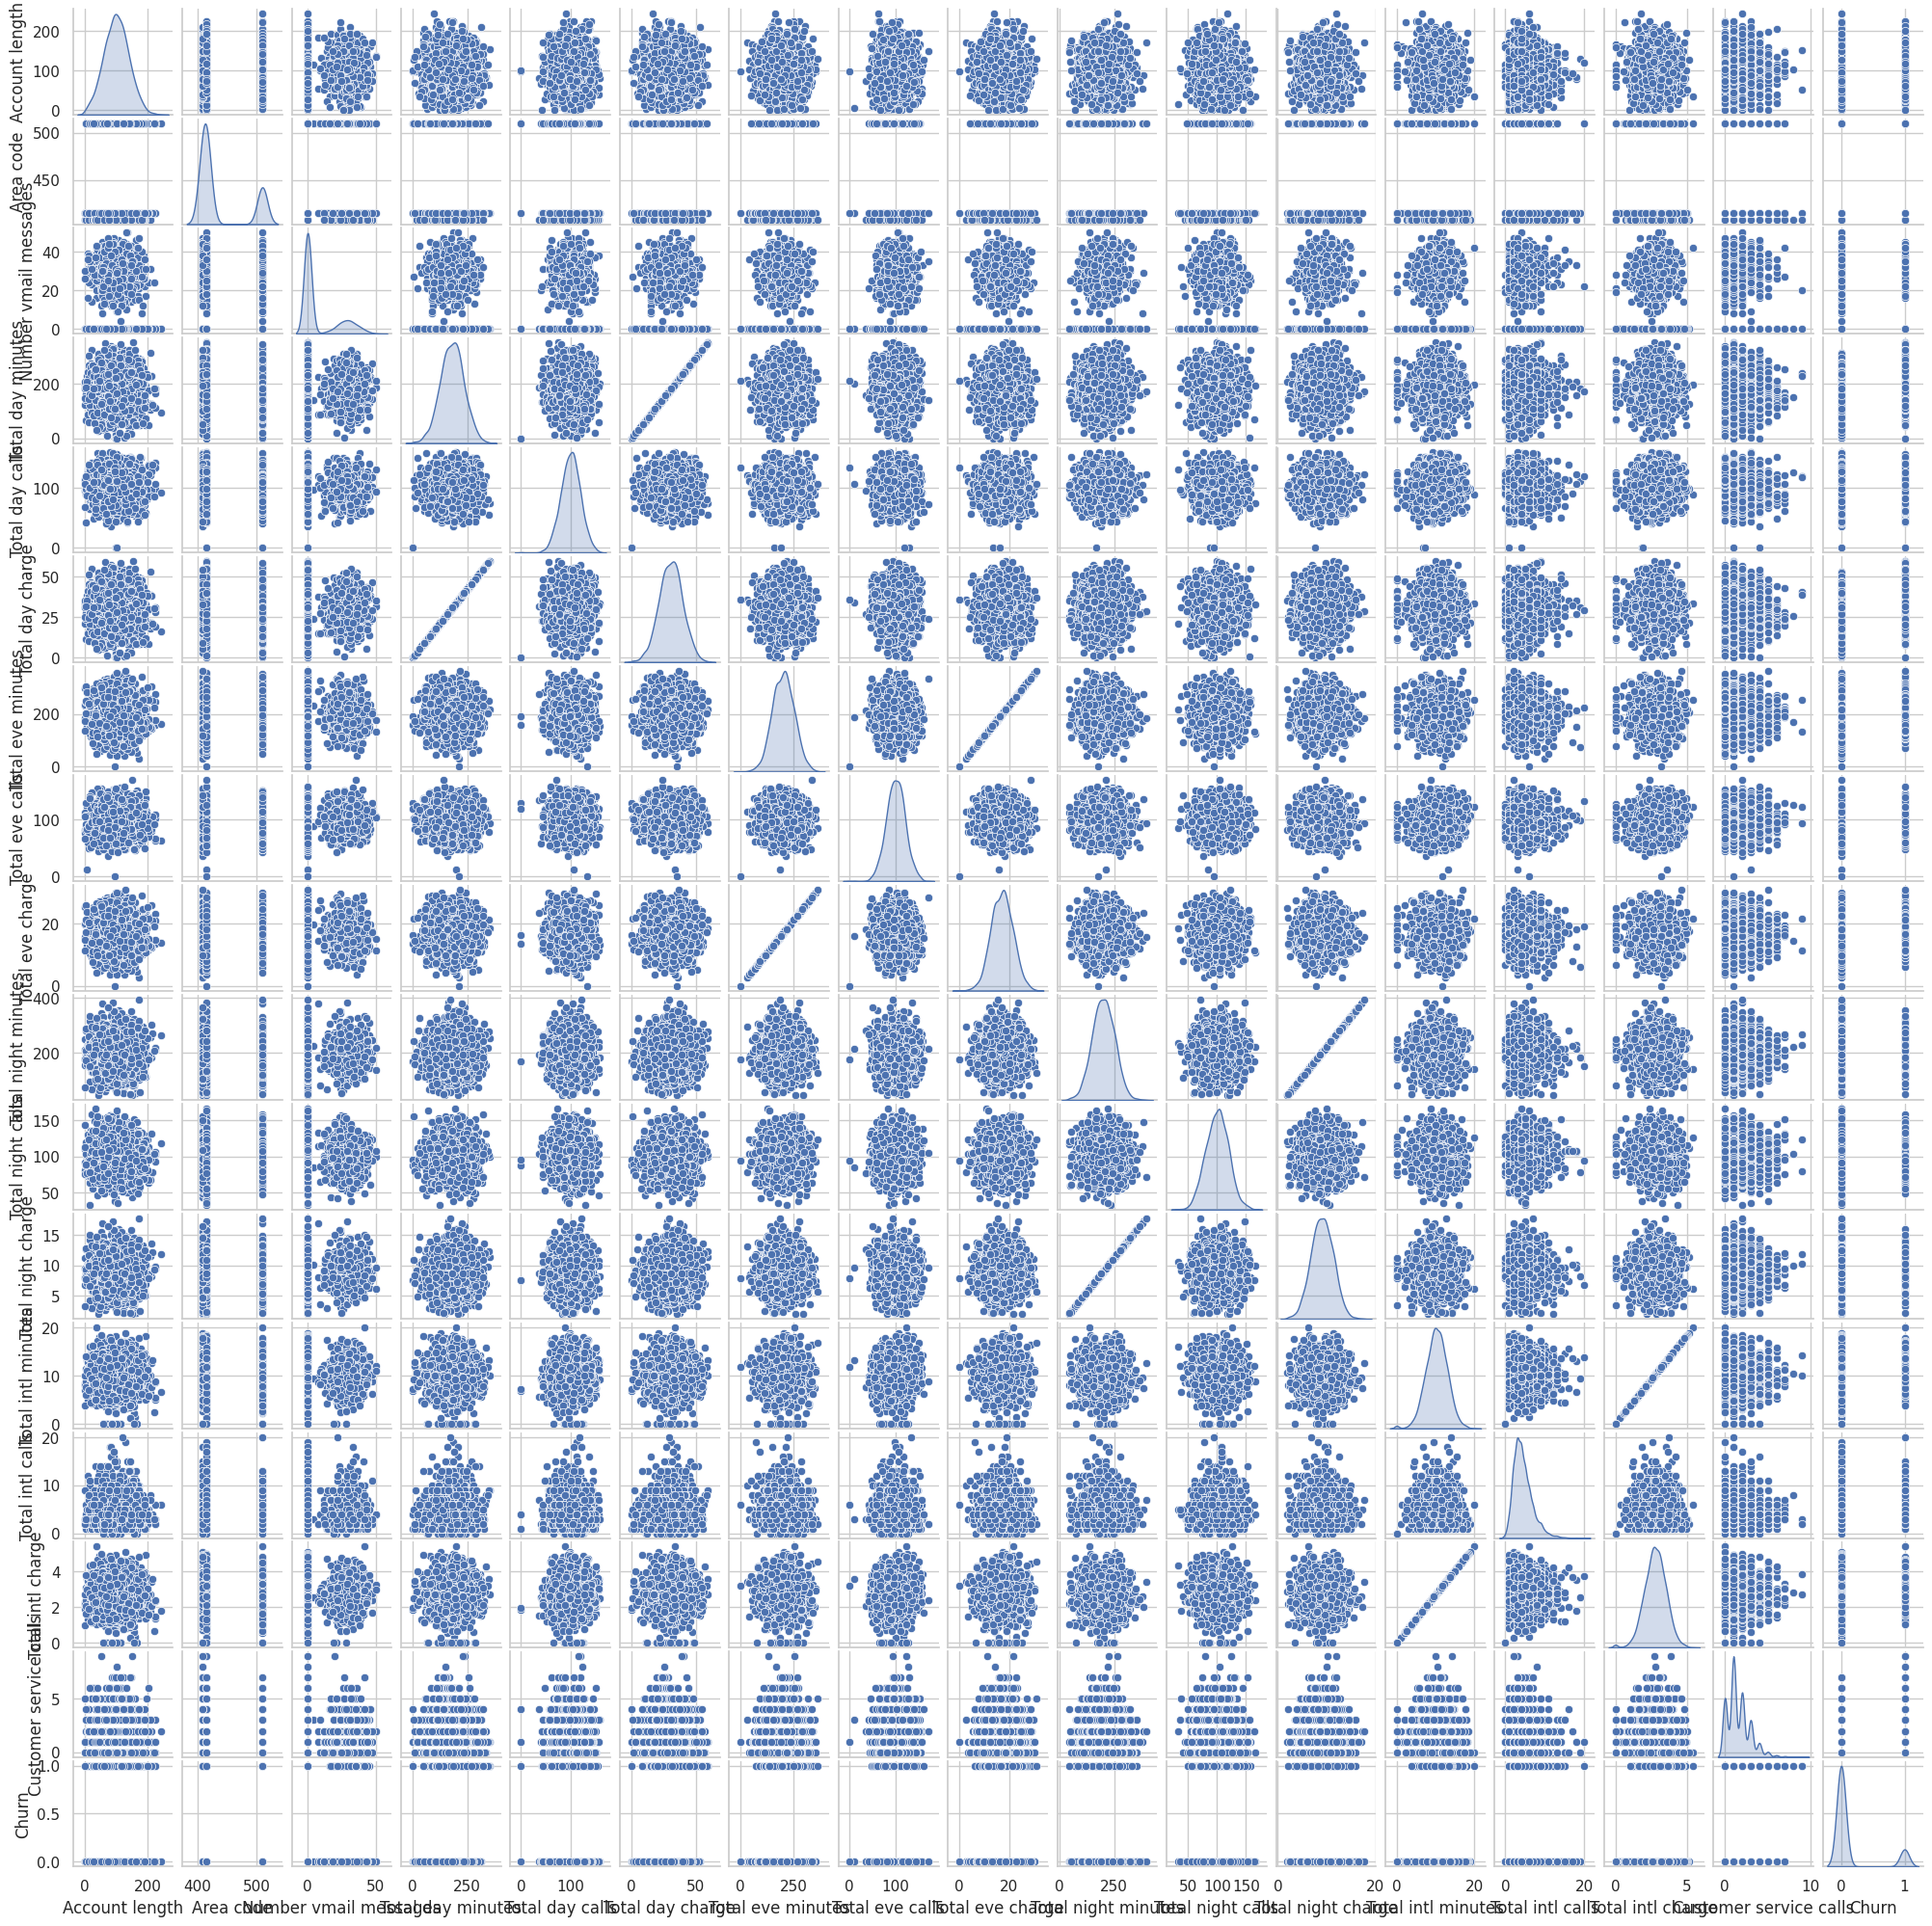

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar el pairplot
sns.pairplot(df, diag_kind="kde")
plt.gcf().set_size_inches(20, 20)
plt.show()


# PRE PROCESAMIENTO

In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
null_values = df.isnull().sum()

# Descripción estadística de los datos numéricos
stats_description = df.describe()
null_values = df.isnull().sum()

label_encoder = LabelEncoder()

# Aplicar la codificación a la columna 'State'
df['State'] = label_encoder.fit_transform(df['State'])

# Conversión de valores categóricos a numéricos
df['International plan'] = df['International plan'].map({'No': 0, 'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [83]:
cleaned_data_head = df.head()

null_values, stats_description, cleaned_data_head

(State                     0
 Account length            0
 Area code                 0
 International plan        0
 Voice mail plan           0
 Number vmail messages     0
 Total day minutes         0
 Total day calls           0
 Total day charge          0
 Total eve minutes         0
 Total eve calls           0
 Total eve charge          0
 Total night minutes       0
 Total night calls         0
 Total night charge        0
 Total intl minutes        0
 Total intl calls          0
 Total intl charge         0
 Customer service calls    0
 Churn                     0
 dtype: int64,
        Account length    Area code  Number vmail messages  Total day minutes  \
 count     2666.000000  2666.000000            2666.000000         2666.00000   
 mean       100.620405   437.438860               8.021755          179.48162   
 std         39.563974    42.521018              13.612277           54.21035   
 min          1.000000   408.000000               0.000000            0.00000   


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [85]:
df.var().sort_values(ascending=False)

Total day minutes         2938.762071
Total eve minutes         2596.056893
Total night minutes       2578.641241
Area code                 1808.036973
Account length            1565.308011
Total eve calls            406.483869
Total day calls            399.526628
Total night calls          377.076533
State                      222.659866
Number vmail messages      185.294086
Total day charge            84.929733
Total eve charge            18.756385
Total intl minutes           7.774888
Total intl calls             6.032893
Total night charge           5.221771
Customer service calls       1.719339
Total intl charge            0.566726
Voice mail plan              0.199424
Churn                        0.124402
International plan           0.091053
dtype: float64

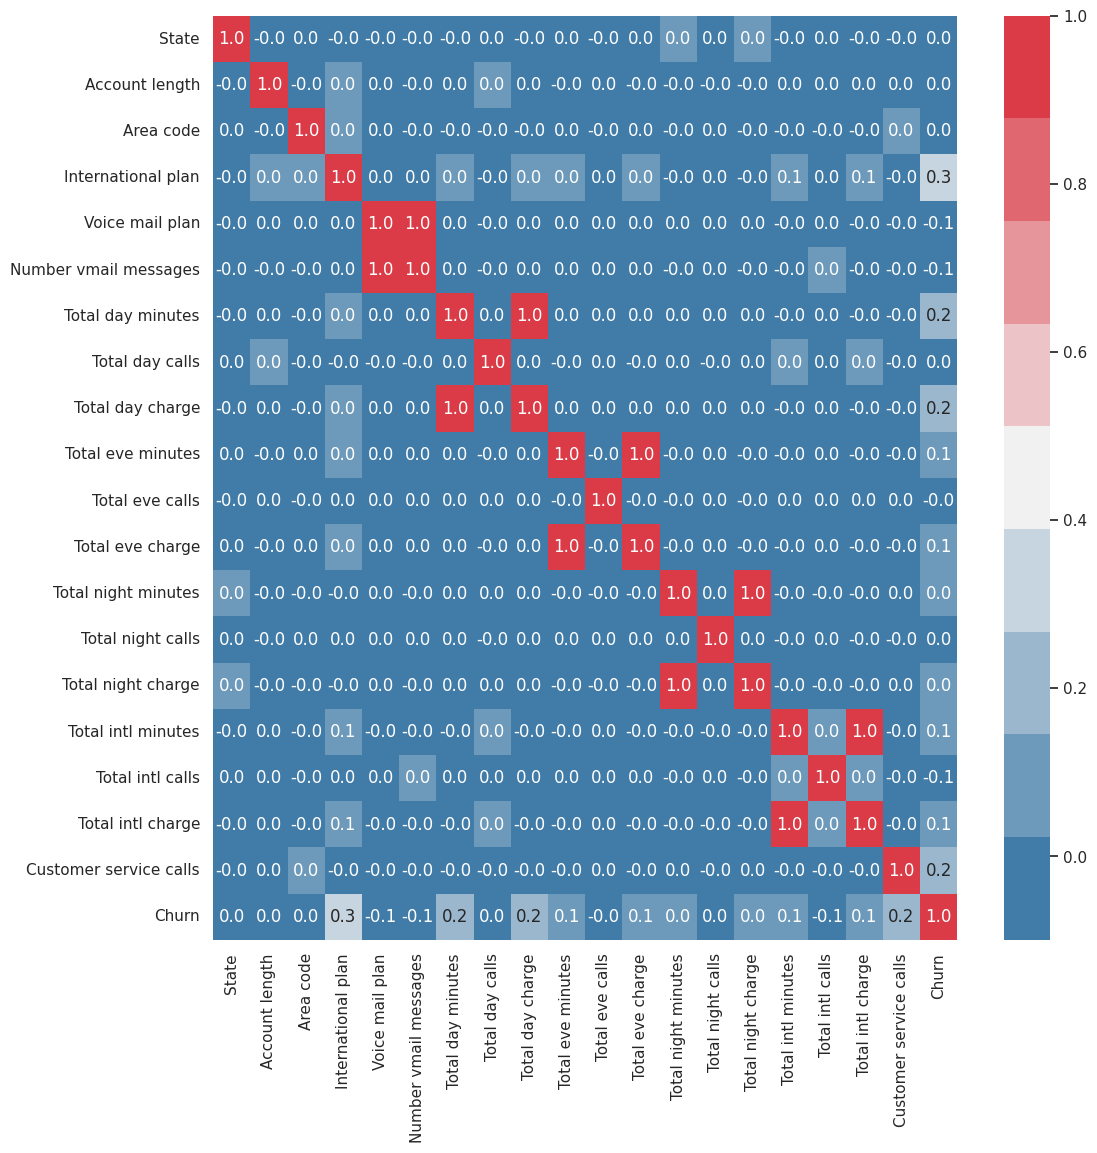

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear el mapa de calor
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240 , 10 , n=9), annot =True, fmt = '.1f', vmax = 1)

# Mostrar el mapa de calor
plt.show()

In [87]:
corr_matrix = df.corr()

In [88]:
correlation_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)

Churn                     1.000000
International plan        0.277489
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
Total intl charge         0.086216
Total intl minutes        0.086204
Total eve minutes         0.072906
Total eve charge          0.072893
Total night minutes       0.033639
Total night charge        0.033635
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Area code                 0.001019
State                     0.000430
Total eve calls          -0.001539
Total intl calls         -0.069882
Number vmail messages    -0.086474
Voice mail plan          -0.099291
Name: Churn, dtype: float64


In [89]:
selected_features = correlation_with_churn[abs(correlation_with_churn) > 0.1].index.tolist()
selected_features.remove('Churn')

In [90]:
selected_features

['International plan',
 'Customer service calls',
 'Total day charge',
 'Total day minutes']

In [91]:
selected_features = ['International plan','Customer service calls','Total day charge','Total day minutes']

In [92]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
features = df[selected_features]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [93]:
normalized_data_df = pd.DataFrame(scaled_features, columns=features.columns)

In [94]:
normalized_data_df.head()

,International plan,Customer service calls,Total day charge,Total day minutes
0,0.0,0.111111,0.755701,0.755701
1,0.0,0.111111,0.460597,0.460661
2,0.0,0.000000,0.693830,0.693843
3,1.0,0.222222,0.853454,0.853478
4,1.0,0.333333,0.475184,0.475200


In [95]:
print(normalized_data_df.isnull().sum())

International plan        0
Customer service calls    0
Total day charge          0
Total day minutes         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



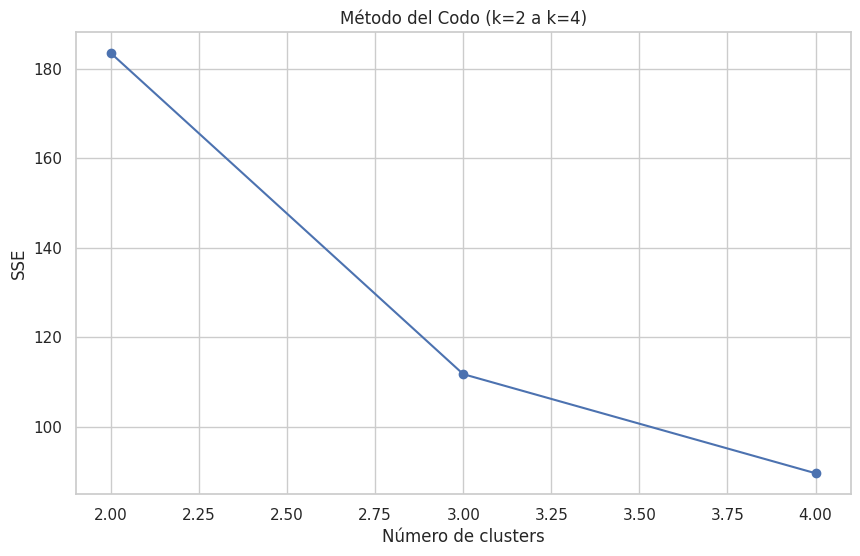

Tiempo total de ejecución: 3.392451047897339 segundos


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.cluster import KMeans
start_time = time.time()

inertia = []

# Método del Codo para k=2 a k=4

for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 5), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo (k=2 a k=4)')
plt.show()


end_time = time.time()
total_time = end_time - start_time

print("Tiempo total de ejecución:", total_time, "segundos")



La gráfica del método del codo para
𝑘
=
2
k=2 a
𝑘
=
4
k=4 muestra una disminución significativa en la SSE (suma de los errores cuadráticos) hasta
𝑘
=
3
k=3, lo que sugiere que
𝑘
=
3
k=3 podría ser un buen número de clusters. Sin embargo, vamos a completar el análisis para
𝑘
=
5
k=5 a
𝑘
=
6
k=6 para tener una visión más completa.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



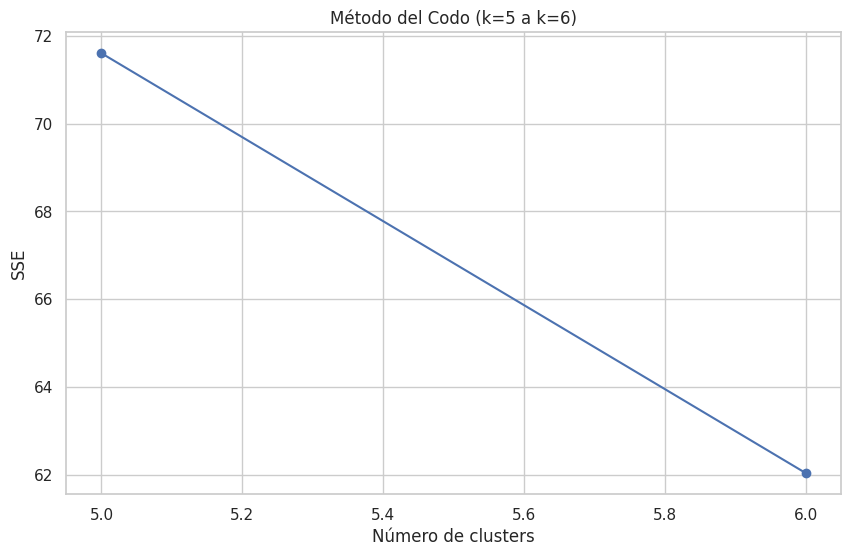

In [100]:
inertia = []

for k in range(5, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(5, 7), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo (k=5 a k=6)')
plt.show()

Las gráficas del método del codo para
𝑘
=
2
k=2 a
𝑘
=
6
k=6 indican que el número óptimo de clusters podría estar alrededor de
𝑘
=
3
k=3 o
𝑘
=
4
k=4, ya que en estos puntos hay un cambio significativo en la pendiente.

Evaluación de la Puntuación de Silueta
Para confirmar esta observación, vamos a evaluar la puntuación de silueta en dos partes:
𝑘
=
2
k=2 a
𝑘
=
4
k=4 y
𝑘
=
5
k=5 a
𝑘
=
6
k=6.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



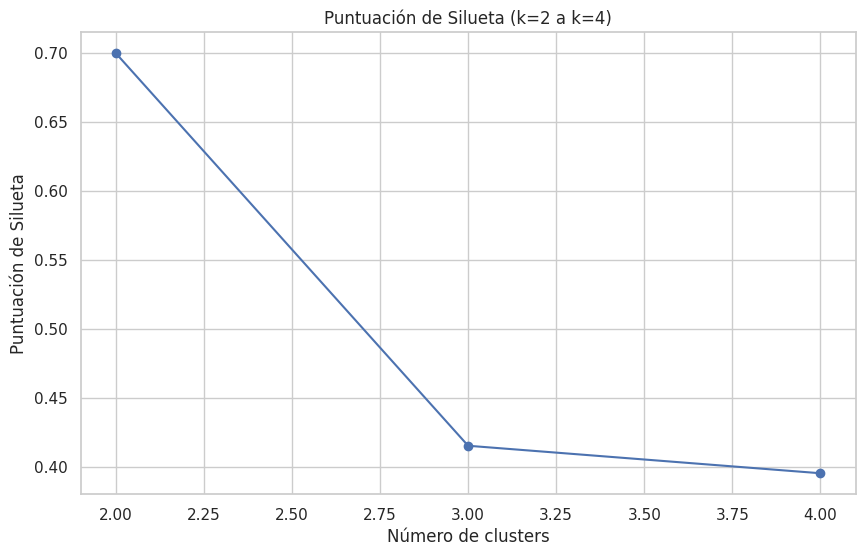

In [102]:
silhouette_scores = []

for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar la puntuación de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta (k=2 a k=4)')
plt.show()

La gráfica de la puntuación de silueta para
𝑘
=
2
k=2 a
𝑘
=
4
k=4 muestra que la mejor puntuación se obtiene para
𝑘
=
3
k=3, lo que sugiere que tres clústeres es una buena opción.

Parte 2: Puntuación de Silueta para
𝑘
=
5
k=5 a
𝑘
=
6
k=6
Para confirmar la elección, vamos a evaluar la puntuación de silueta para
𝑘
=
5
k=5 a
𝑘
=
6
k=6:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



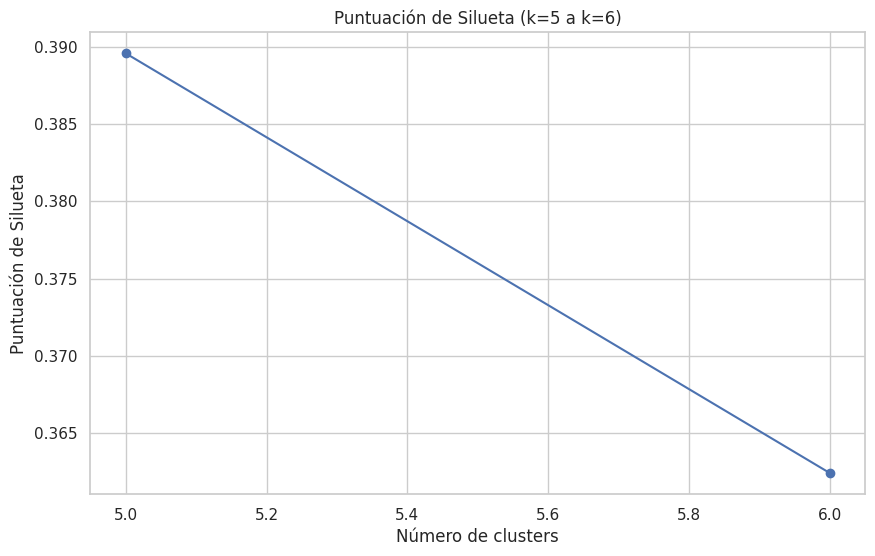

In [103]:



silhouette_scores = []

for k in range(5, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar la puntuación de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(5, 7), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta (k=5 a k=6)')
plt.show()

La gráfica de la puntuación de silueta para
𝑘
=
5
k=5 a
𝑘
=
6
k=6 muestra que la puntuación de silueta disminuye a medida que aumenta el número de clústeres en este rango. Esto refuerza la conclusión de que
𝑘
=
3
k=3 es el número óptimo de clústeres.

Análisis e Interpretación de los Clústeres
Dado que
𝑘
=
3
k=3 parece ser el número óptimo de clústeres, vamos a proceder con la ejecución del algoritmo KMeans con
𝑘
=
3
k=3 y analizaremos los clústeres resultantes.

In [104]:
# Aplicar el modelo KMeans con 3 clusters al conjunto de datos completo
optimal_clusters = 3
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(normalized_data_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [105]:
# Analizar los clusters
cluster_summary = df.groupby('Cluster').mean()

In [106]:
display(cluster_summary)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Cluster,,,,,,,,,,,,,,,,,,,,
0,25.557085,99.930364,436.519028,0.0,0.282591,8.293117,220.188421,100.365182,37.432486,200.259838,100.068016,17.022332,201.464372,100.240486,9.065943,10.144858,4.489879,2.739765,1.550607,0.135223
1,25.896296,103.507407,443.403704,1.0,0.277778,8.259259,187.481852,100.055556,31.872593,204.425185,100.640741,17.376481,199.609630,101.151852,8.982481,10.678519,4.551852,2.883407,1.422222,0.437037
2,26.577950,100.683032,437.030146,0.0,0.266150,7.677864,134.319724,100.310939,22.834927,199.581223,99.832903,16.964634,201.217313,99.720069,9.054918,10.232386,4.423773,2.763135,1.608096,0.088717


In [107]:
print(cluster_summary)

             State  Account length   Area code  International plan  \
Cluster                                                              
0        25.557085       99.930364  436.519028                 0.0   
1        25.896296      103.507407  443.403704                 1.0   
2        26.577950      100.683032  437.030146                 0.0   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0               0.282591               8.293117         220.188421   
1               0.277778               8.259259         187.481852   
2               0.266150               7.677864         134.319724   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             100.365182         37.432486         200.259838   
1             100.055556         31.872593         204.425185   
2             100.310939         22.83

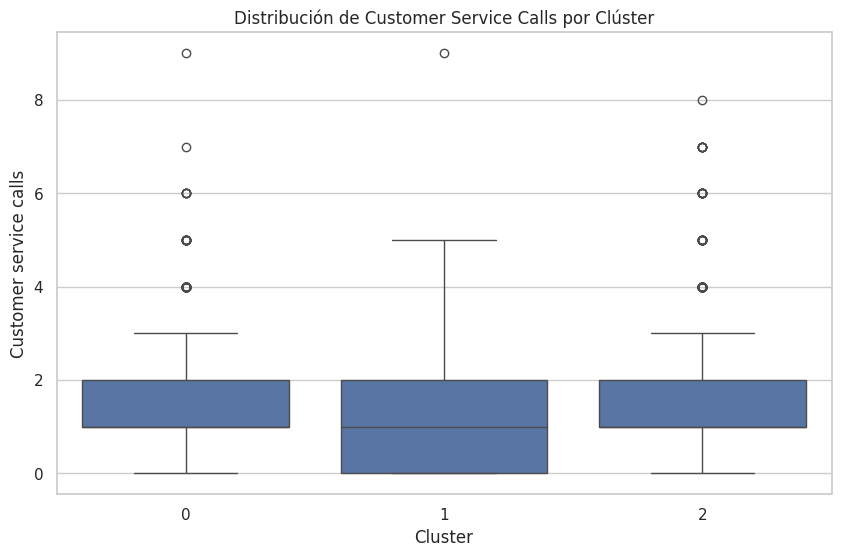

In [109]:
import seaborn as sns

# Visualización de la distribución de 'Customer service calls' por clúster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Customer service calls', data=df)
plt.title('Distribución de Customer Service Calls por Clúster')
plt.show()


Distribución de Customer service calls por clúster:

El gráfico de cajas muestra que los clústeres tienen diferentes distribuciones en cuanto al número de llamadas al servicio de atención al cliente.
Por ejemplo, un clúster tiene una mediana más alta de llamadas al servicio al cliente, lo que puede indicar que los clientes en este clúster tienen más problemas o preguntas.

Clúster 0:

La mediana del número de llamadas al servicio al cliente es aproximadamente 2.
Hay varios valores atípicos (outliers) que indican clientes que han realizado más de 6 llamadas.

Clúster 1:

La mediana del número de llamadas es también aproximadamente 2, pero este clúster tiene una distribución más amplia que los otros clústeres.
Hay clientes que han realizado hasta 8 llamadas, lo que sugiere problemas recurrentes o insatisfacción significativa con el servicio.

Clúster 2:

Similar al clúster 0, la mediana es aproximadamente 2.
También hay algunos outliers con hasta 8 llamadas, aunque menos pronunciado que en el clúster 1.


Problemas Generales Identificados:

Insatisfacción con el Servicio al Cliente:

Todos los clústeres tienen una mediana similar en términos de llamadas al servicio de atención al cliente, pero el clúster 1 muestra una mayor variabilidad y más casos extremos.
Los valores atípicos en todos los clústeres indican que hay clientes con problemas significativos que requieren múltiples interacciones con el servicio de atención al cliente.

Frecuencia de Problemas no Resueltos:

La presencia de outliers sugiere que hay un subconjunto de clientes que están experimentando problemas no resueltos, lo que puede conducir a la frustración y al eventual abandono.

El clúster 1, en particular, podría estar enfrentando problemas más graves o complejos, dado el mayor número de llamadas.

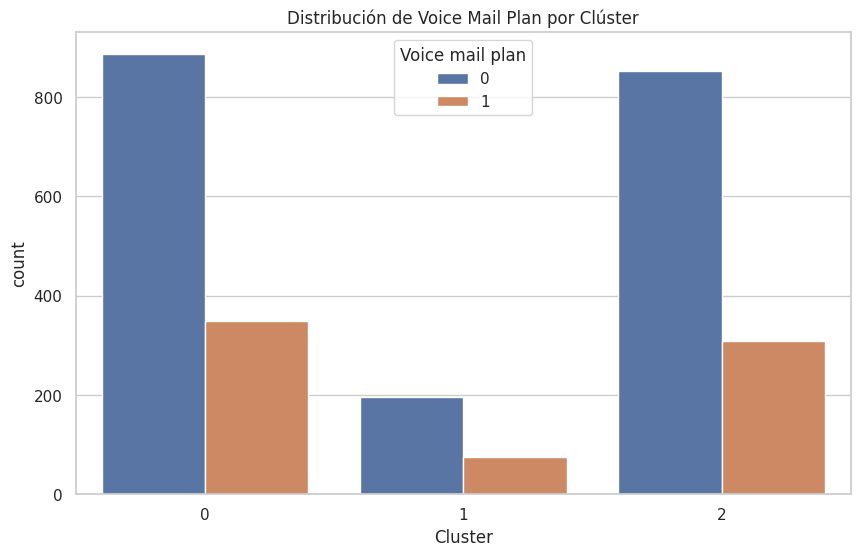

In [112]:
# Visualización de la distribución de 'Voice mail plan' por clúster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Voice mail plan', data=df)
plt.title('Distribución de Voice Mail Plan por Clúster')
plt.show()


Análisis de la Distribución de Voice mail plan por Clúster

La gráfica muestra la distribución de clientes con y sin plan de correo de voz (Voice mail plan) en cada clúster.

Clúster 0:

La mayoría de los clientes en este clúster no tienen un plan de correo de voz (representados en azul).

Sin embargo, una cantidad significativa de clientes tiene un plan de correo de voz (representados en naranja).

Clúster 1:

Este clúster tiene una proporción menor de clientes en general.

La mayoría de los clientes en este clúster no tienen un plan de correo de voz, con solo unos pocos clientes que sí tienen el plan.

Clúster 2:

Similar al clúster 0, la mayoría de los clientes no tienen un plan de correo de voz.

Hay una cantidad notable de clientes con un plan de correo de voz, aunque menor en comparación con aquellos sin el plan.

---------------------------------------------------------------


Problemas Identificados en Función a la Distribución:

A partir de la distribución de Voice mail plan por clúster, junto con los otros análisis realizados, se pueden identificar varios problemas generales que pueden contribuir al abandono de clientes:

Falta de Adopción de Planes Adicionales:

Un gran número de clientes no tiene planes de correo de voz. Esto puede indicar que los clientes no ven valor en estos planes adicionales o que no se les ha incentivado adecuadamente para adoptarlos.

Segmentación de Clientes:

La variabilidad en la adopción de planes de correo de voz entre los clústeres sugiere que diferentes segmentos de clientes tienen diferentes necesidades y percepciones del valor de estos planes.

Es posible que algunos segmentos de clientes no sean conscientes de las ventajas de los planes de correo de voz o que consideren que no los necesitan.

Costos y Valor Percibido:

Los clientes que no tienen planes de correo de voz pueden estar más enfocados en reducir sus costos generales, especialmente si ya están insatisfechos con los cargos actuales.

Es importante asegurar que los planes de correo de voz ofrezcan un valor claro y tangible para justificar su adopción.